In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('polls_us_election_2016_v4.csv')
df['538 Grade'] = np.where(df['538 Grade'].isna(), 'C+', df['538 Grade'])
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'state', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'rawpoll_clinton', 'rawpoll_trump',
       'rawpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_clinton',
       'adjpoll_trump', 'adjpoll_johnson', 'adjpoll_mcmullin', 'pop_type__a',
       'pop_type__lv', 'pop_type__rv', 'pop_type__v', 'poll_wt', 'duration',
       'Pollster', '# of Polls', 'NCPP / AAPOR / Roper',
       'Live Caller With Cellphones', 'Internet', 'Banned by 538',
       'Historical Advanced Plus-Minus', 'Predictive    Plus-Minus',
       '538 Grade', 'Mean-Reverted Bias', 'Races Called Correctly',
       'Misses Outside MOE', 'Simple Average Error', 'Simple Expected Error',
       'Simple Plus-Minus', 'Advanced Plus-Minus',
       'Mean-Reverted Advanced Plus Minus', 'Predictive Plus-Minus',
       '# of Polls for Bias Analysis', 'Bias', 'Mean-Reverted Bias.1',
       'House Effect'],
      dtype='object')

# Rug Plot of Dates

<Axes: xlabel='startdate', ylabel='enddate'>

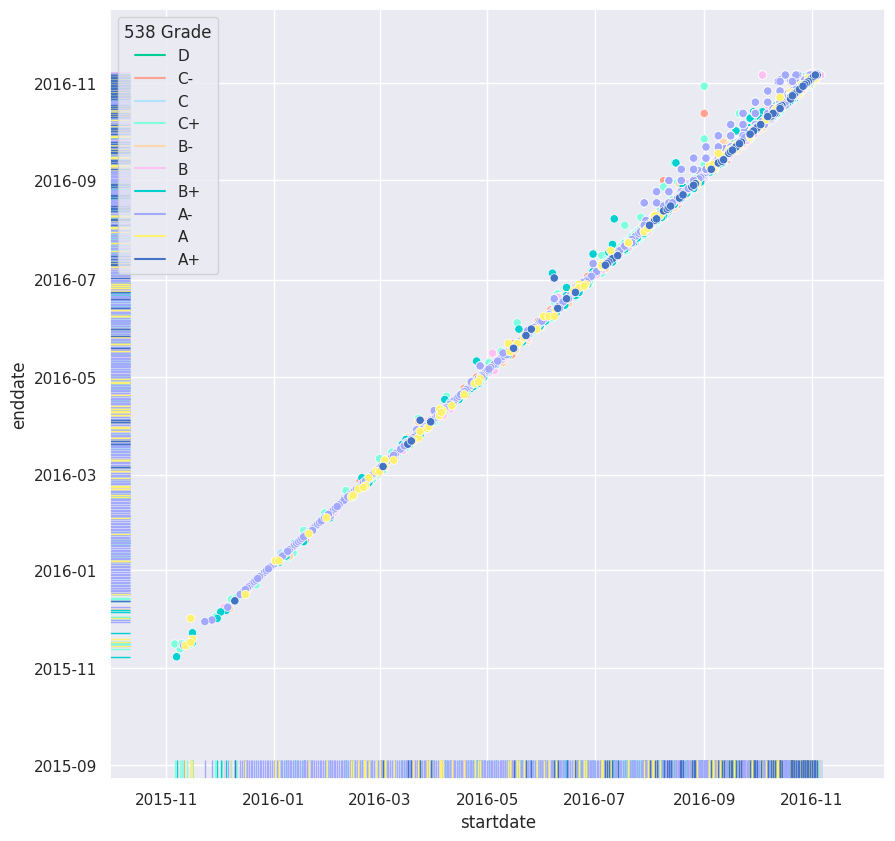

In [3]:
df["startdate"] = df.apply (lambda x: pd.Timestamp(x["startdate"]), axis=1)
df["enddate"] = df.apply (lambda x: pd.Timestamp(x["enddate"]), axis=1)

colors = ["#00CF95","#FFA191","#B3E2FF","#7FFFDD","#FFD6AC","#FFC1F2","#00D0D0","#A2A9FF","#FFF170","#4472C4"]
sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette(sns.color_palette(colors))

sns.scatterplot(data=df.sort_values('grade', ascending=True), x="startdate", y="enddate", hue='538 Grade')
sns.rugplot(data=df.sort_values('grade', ascending=True), x="startdate", y="enddate", hue='538 Grade')

# Duration Density Plot

<Axes: xlabel='duration', ylabel='Density'>

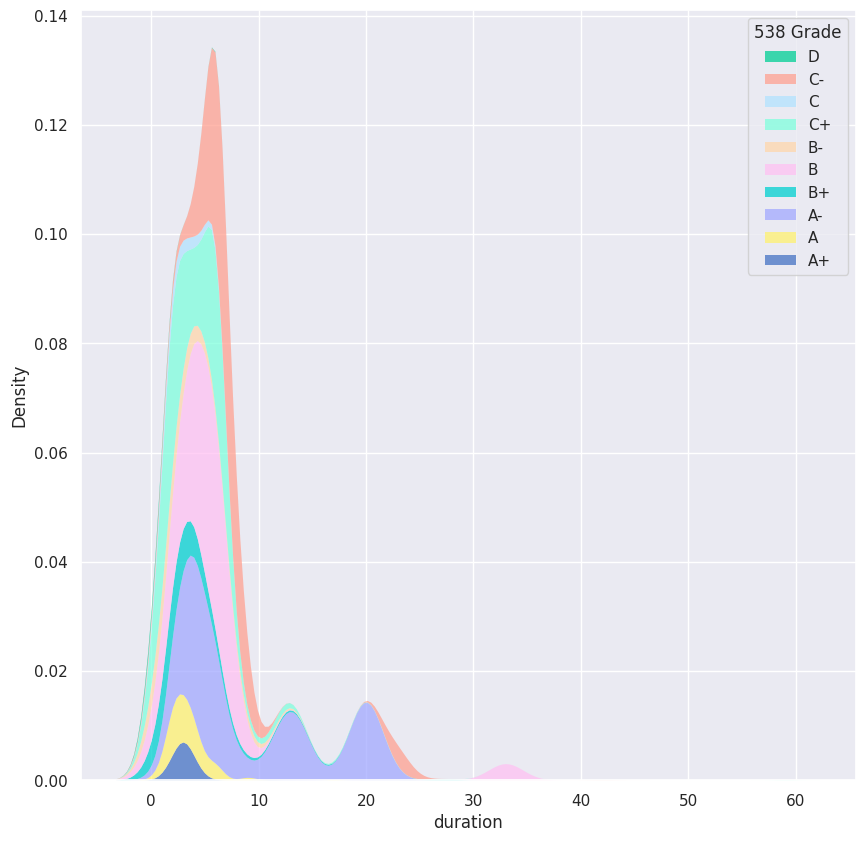

In [4]:
colors = ["#00CF95","#FFA191","#B3E2FF","#7FFFDD","#FFD6AC","#FFC1F2","#00D0D0","#A2A9FF","#FFF170","#4472C4"]

sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette(sns.color_palette(colors))

sns.kdeplot(data=df.sort_values('grade', ascending=True), x="duration", hue='538 Grade', linewidth=0, multiple="stack")

# Number of Polls density

<Axes: xlabel='# of Polls', ylabel='Density'>

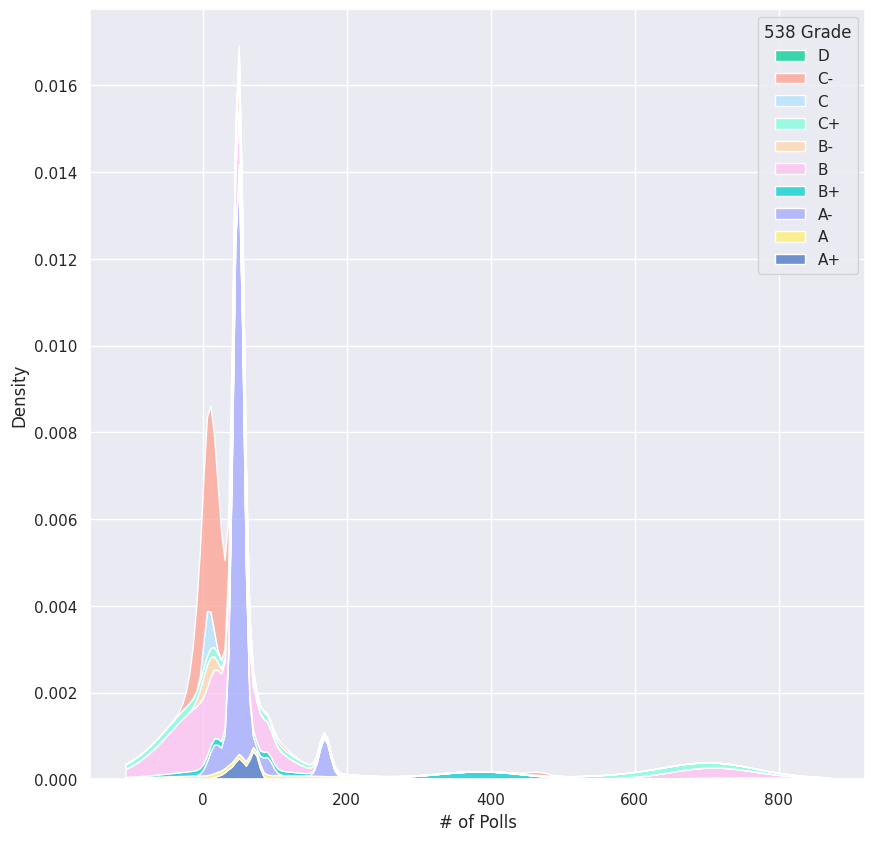

In [5]:
sns.set(rc={'figure.figsize':(10,10)})
colors = ["#00CF95","#FFA191","#B3E2FF","#7FFFDD","#FFD6AC","#FFC1F2","#00D0D0","#A2A9FF","#FFF170","#4472C4"]
sns.set_palette(sns.color_palette(colors))
sns.kdeplot(data=df.sort_values('grade', ascending=True), x="# of Polls", hue="538 Grade", multiple="stack")

# Plus-minus Scatter plot

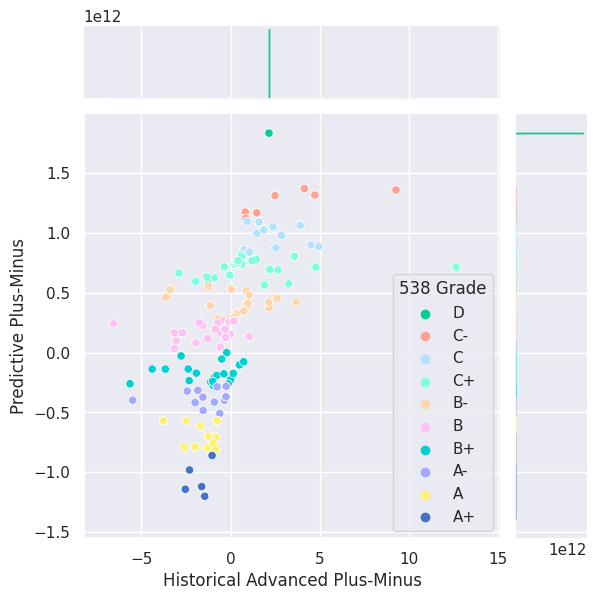

In [6]:
colors = ["#00CF95","#FFA191","#B3E2FF","#7FFFDD","#FFD6AC","#FFC1F2","#00D0D0","#A2A9FF","#FFF170","#4472C4"]

sns.set(rc={'figure.figsize':(10,10)})
sns.set_palette(sns.color_palette(colors))

sns.jointplot(data=df.sort_values('grade', ascending=True), x="Historical Advanced Plus-Minus", y="Predictive Plus-Minus", hue="538 Grade")

# State Grade

In [7]:
df_test = df.sort_values('grade', ascending=False)[df['state']!='U.S.'][["state", "grade", "538 Grade"]]
df_test = df.sort_values('grade', ascending=False)[["state", "grade", "538 Grade"]]
alpha_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maine CD-1': 'ME',
    'Maine CD-2': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nebraska CD-1': 'NE',
    'Nebraska CD-2': 'NE',
    'Nebraska CD-3': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY', 
    'District of Columbia' : 'DC'
    }
df_test['state'] = np.where(df_test['state'].isin(alpha_codes.keys()), df_test['state'].map(alpha_codes), df_test['state'])


<Axes: xlabel='Count', ylabel='state'>

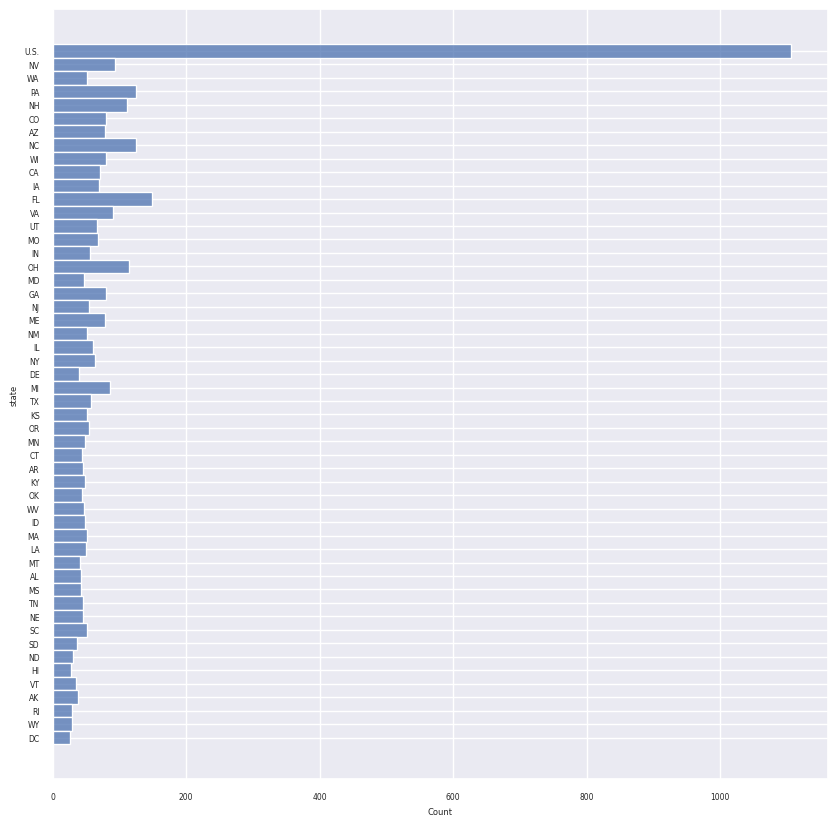

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.5)

sns.histplot(data=df_test, y="state")

In [9]:
df_test= df_test[df_test['state']!='U.S.'].groupby(["state", "grade","538 Grade"]).size().reset_index(name='freq')

fig = px.bar_polar(df_test, r="freq",theta="state", color="538 Grade",
                   #color_discrete_sequence= px.colors.sequential.Plasma_r, 
                   color_discrete_map= {'A+': '#4472C4',
                                        'A' : '#FFF170',
                                        'A-': '#A2A9FF',
                                        'B+': '#00D0D0',
                                        'B' : '#FFC1F2',
                                        'B-': '#FFD6AC',
                                        'C+': '#7FFFDD',
                                        'C' : '#B3E2FF',
                                        'C-': '#FFA191',
                                        'D' : '#00CF95'},
                   height=1000
                  )
fig.show()

In [10]:
df_test = df.sort_values('grade', ascending=False)[df['state']=='U.S.'][["state", "grade", "538 Grade"]]
df_test = df_test.groupby(["state", "grade","538 Grade"]).size().reset_index(name='freq')
df_test = df_test.sort_values('grade', ascending=False)

fig = px.bar_polar(df_test, r="freq",theta="538 Grade", color="538 Grade",
                   #color_discrete_sequence= px.colors.sequential.Plasma_r, 
                   color_discrete_map= {'A+': '#4472C4',
                                        'A' : '#FFF170',
                                        'A-': '#A2A9FF',
                                        'B+': '#00D0D0',
                                        'B' : '#FFC1F2',
                                        'B-': '#FFD6AC',
                                        'C+': '#7FFFDD',
                                        'C' : '#B3E2FF',
                                        'C-': '#FFA191',
                                        'D' : '#00CF95'},
                   height=1000
                  )
fig.show()

# Correlation Plot

In [14]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


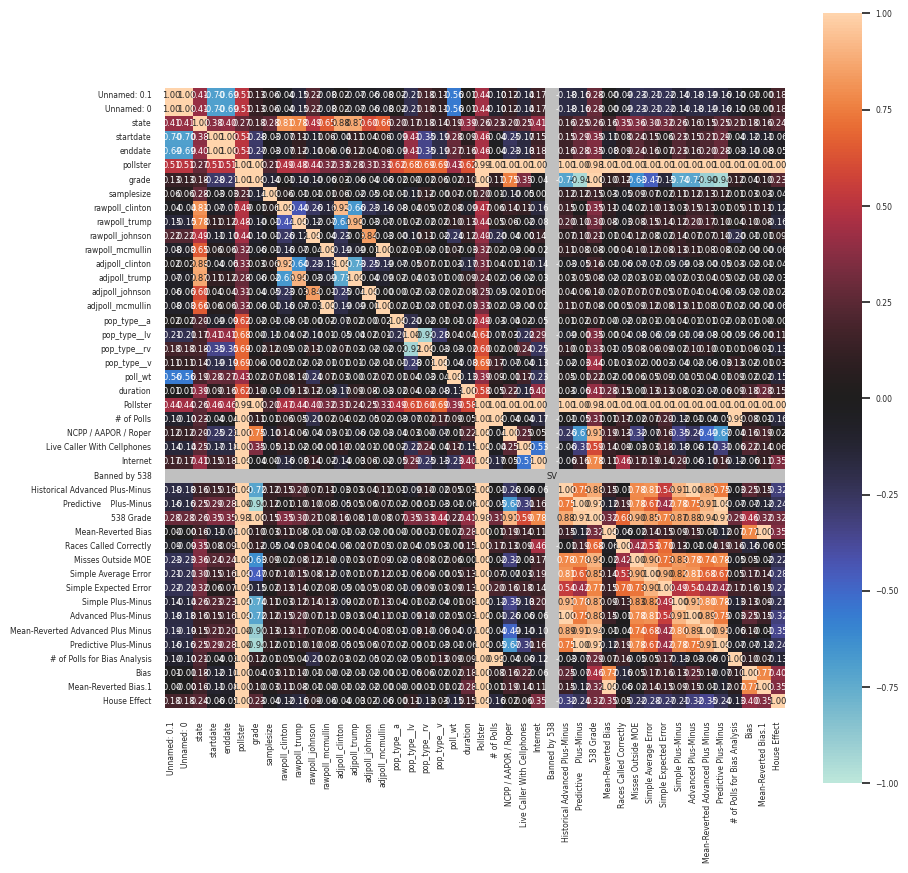

<Axes: xlabel='grade'>

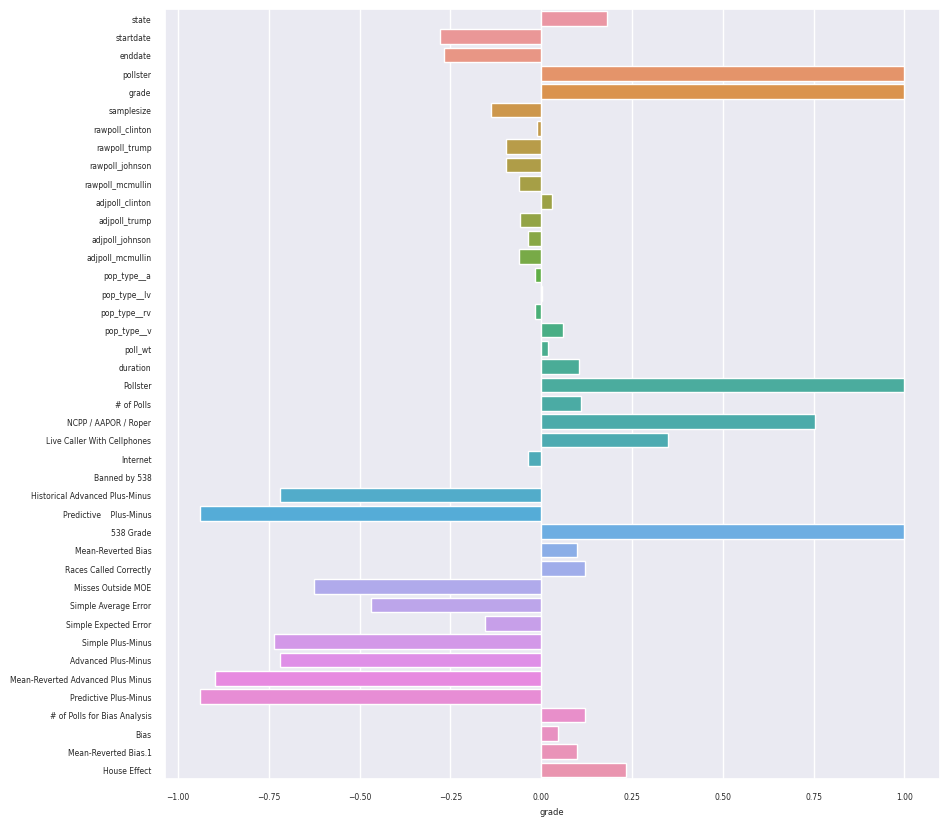

In [16]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features=identify_nominal_columns(df)
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))['corr']

sns.barplot(y=complete_correlation.columns[2:],x=complete_correlation.iloc[6][2:])